In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from matplotlib import pyplot as plt
from felpy.model.src.coherent import construct_SA1_wavefront

from wpg.optical_elements import Drift
from felpy.model.core.beamline import Beamline
from felpy.model.beamlines.exfel_spb.exfel_spb import Instrument, propagation_parameters
from felpy.model.beamlines.exfel_spb.methods import get_beamline_object

from wpg.srwl_uti_smp import srwl_opt_setup_transm_from_file as Sample


In [2]:
def propThruMaskLite(wfr, _x = 0, _y = 0):
    """
    propagate through the speckle generator
    """
    s = Sample("/gpfs/exfel/data/user/guestt/FELpy/felpy/data/samples/speckle.tif", 
               rx = 100e-06/1000, ry = 100e-06/1000,
               thickness = 60e-06,
               delta = 3.35e-03,
               atten_len = 20e-06,
               xc = 0, yc = 0,
               shift_x = _y, shift_y = _x)


    bl = Beamline()
    bl.append(s, propagation_parameters(1,1,1,1,mode = 'fresnel'))
    bl.propagate(wfr)
    
    return wfr
    
def z_eff(z1,z2):
    return z1*z2/(z1+z2)
    

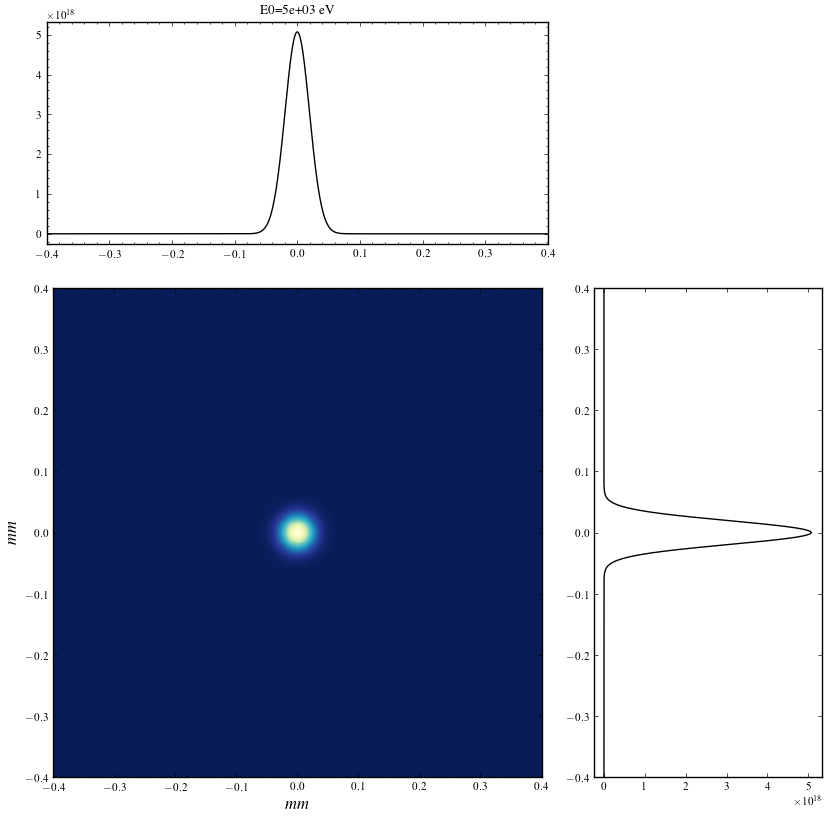

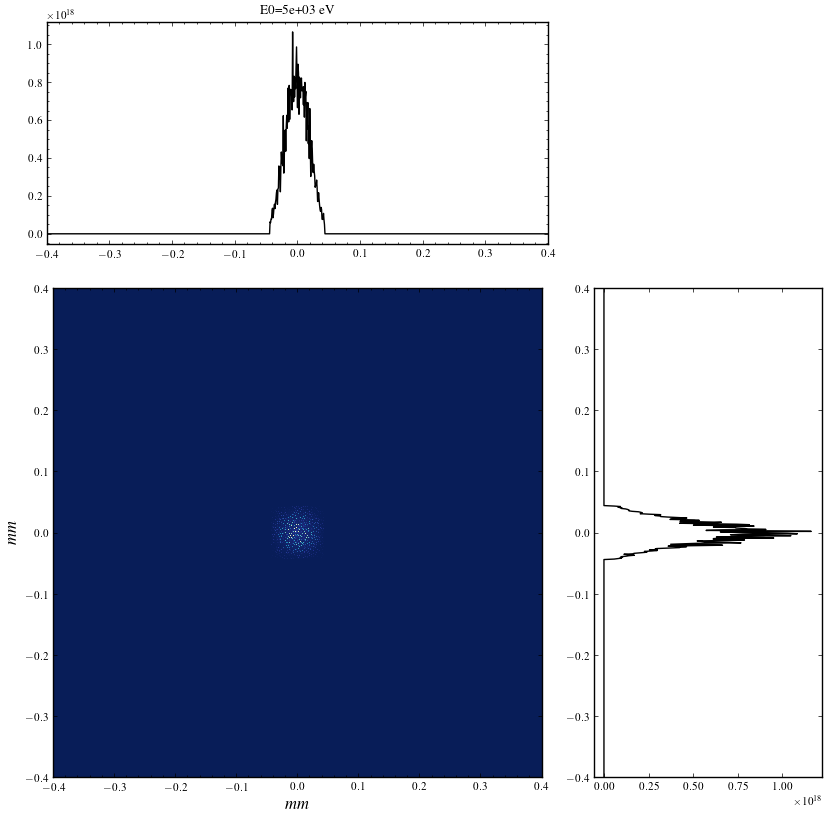

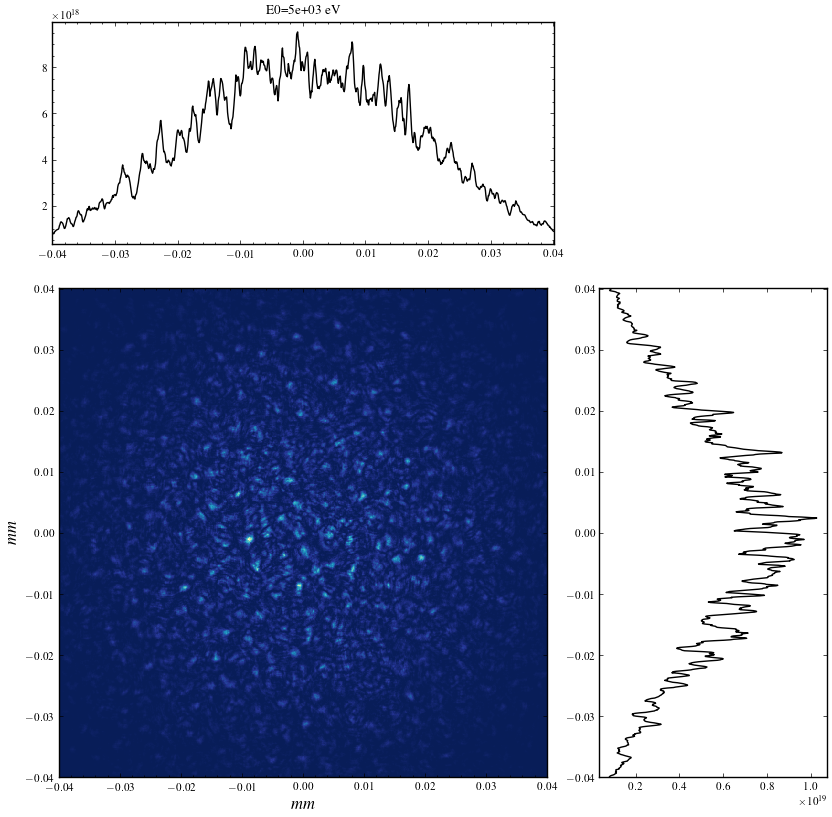

In [4]:
z = z_eff(8e-03, 3.5)
from wpg.wpg_uti_wf import plot_intensity_map as plotIntensity

wfr = construct_SA1_wavefront(1024,1024,5,0.25)

#bl = get_beamline_object(crop = "NVE")
#bl.append(Drift(2.2+1), propagation_parameters(2, 1, 2, 1, mode = 'quadratic'))
#bl.propagate(wfr)
plotIntensity(wfr)
#plotIntensity(wfr)
# print("Pixel Size: {}".format(wfr.get_spatial_resolution()))
propThruMaskLite(wfr)
plotIntensity(wfr)

bl = Beamline()
bl.append(Drift(z), propagation_parameters(1/10,1,1/10,1, 'quadratic'))
bl.propagate(wfr)
plotIntensity(wfr)

NameError: name 'data' is not defined

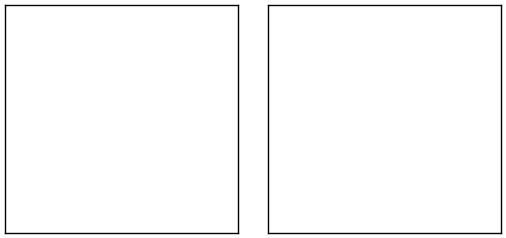